In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from scipy.stats import t, ttest_ind

In [2]:
bodf = pd.read_csv('boxoffice.csv',index_col=0)
bodf.head()

,imdbID,Title,Year,Rated,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,...,Runtime,Director,Actors,Awards,vote_average,vote_count,belongs_to_collection,production_companies,spoken_languages,multiplier
0,tt0114709,Toy Story,1995,G,NaN,191796233.0,29140617.0,8.3,820774.0,100.0,...,81.0,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",Nominated for 3 Oscars. Another 23 wins & 17 n...,7.7,5415.0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_639_1': 'en', 'name': 'English'}]",6.581749
1,tt0113497,Jumanji,1995,PG,65000000.0,100475249.0,11084370.0,7.0,276338.0,54.0,...,104.0,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",4 wins & 9 nominations.,6.9,2413.0,NaN,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",9.064588
2,tt0113228,Grumpier Old Men,1995,PG-13,NaN,71518503.0,7797185.0,6.7,22673.0,17.0,...,101.0,Howard Deutch,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",2 wins & 2 nominations.,6.5,92.0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_639_1': 'en', 'name': 'English'}]",9.172349
3,tt0114885,Waiting to Exhale,1995,R,NaN,67052156.0,14126927.0,5.9,8898.0,56.0,...,124.0,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",8 wins & 9 nominations.,6.1,34.0,NaN,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_639_1': 'en', 'name': 'English'}]",4.746408
4,tt0113041,Father of the Bride Part II,1995,PG,NaN,76594107.0,11134978.0,6.0,31909.0,48.0,...,106.0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Nominated for 1 Golden Globe. Another 1 win & ...,5.7,173.0,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_639_1': 'en', 'name': 'English'}]",6.878694


In [3]:
bodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 22 columns):
imdbID                   10793 non-null object
Title                    12047 non-null object
Year                     12047 non-null object
Rated                    11534 non-null object
Budget                   2972 non-null float64
Domestic Gross           12047 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               12046 non-null float64
imdbVotes                12045 non-null float64
Rotten Tomatoes Score    11248 non-null float64
Metascore                8974 non-null float64
Genre                    12045 non-null object
Runtime                  12044 non-null float64
Director                 12042 non-null object
Actors                   11992 non-null object
Awards                   9804 non-null object
vote_average             11884 non-null float64
vote_count               11884 non-null float64
belongs_to_collection    1519 non-null

In [4]:
bodf.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,2.972000e+03,1.204700e+04,1.102200e+04,12046.000000,1.204500e+04,11248.000000,8974.000000,12044.000000,11884.000000,11884.000000,11022.000000
mean,4.439488e+07,2.155059e+07,5.629878e+06,6.451337,5.058787e+04,59.125445,57.346891,104.818001,5.834239,187.550067,22.756284
std,4.494077e+07,4.719193e+07,1.376996e+07,0.984722,1.224700e+05,27.648677,17.593263,21.546312,1.628050,630.690179,118.109832
min,2.200000e+02,3.000000e+01,2.000000e+01,1.500000,1.700000e+01,0.000000,1.000000,4.000000,0.000000,0.000000,0.480129
25%,1.300000e+07,1.394235e+05,1.714725e+04,5.900000,2.523000e+03,37.000000,45.000000,92.000000,5.300000,6.000000,2.548041
50%,3.000000e+07,2.479538e+06,1.940740e+05,6.500000,9.456000e+03,64.000000,59.000000,101.000000,6.100000,19.000000,3.960321
75%,6.000000e+07,2.180542e+07,5.520745e+06,7.200000,4.182100e+04,83.000000,71.000000,113.000000,6.800000,94.000000,11.084361
max,3.000000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,12114.000000,5757.944732


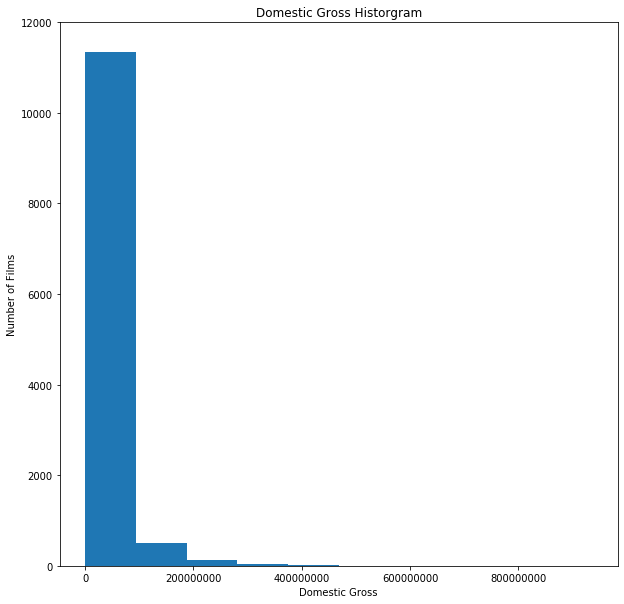

In [5]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(bodf['Domestic Gross'])
_ = plt.title('Domestic Gross Historgram')
_ = plt.xlabel('Domestic Gross')
_ = plt.ylabel('Number of Films')
_ = plt.ylim(0,12000)
_ = plt.ticklabel_format(useOffset= False,style= 'plain')
plt.show()

In [6]:
gross_mean = bodf['Domestic Gross'].mean()
gross_std = bodf['Domestic Gross'].std()
print('The Domestic Gross Mean:  ',gross_mean)
print('The Domestic Gross STD:  ',gross_std)

The Domestic Gross Mean:   21550590.411471736
The Domestic Gross STD:   47191928.34335942


In [7]:
n = len(bodf['Domestic Gross'])
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20843314.40459191

In [8]:
good_reception = bodf[bodf['Rotten Tomatoes Score'] >= 80]
bad_reception = bodf[bodf['Rotten Tomatoes Score'] <= 40]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=1.3780678450897141, pvalue=0.168228603182457)

In [9]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=1.406879222081442, pvalue=0.15951933367412133)

In [10]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466 entries, 0 to 45263
Data columns (total 22 columns):
imdbID                   3139 non-null object
Title                    3466 non-null object
Year                     3466 non-null object
Rated                    3265 non-null object
Budget                   634 non-null float64
Domestic Gross           3466 non-null float64
Opening Weekend          3035 non-null float64
imdbRating               3466 non-null float64
imdbVotes                3465 non-null float64
Rotten Tomatoes Score    3466 non-null float64
Metascore                2842 non-null float64
Genre                    3465 non-null object
Runtime                  3466 non-null float64
Director                 3464 non-null object
Actors                   3429 non-null object
Awards                   3257 non-null object
vote_average             3409 non-null float64
vote_count               3409 non-null float64
belongs_to_collection    420 non-null object
production

In [11]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 2 to 45373
Data columns (total 22 columns):
imdbID                   2825 non-null object
Title                    3201 non-null object
Year                     3201 non-null object
Rated                    3168 non-null object
Budget                   1109 non-null float64
Domestic Gross           3201 non-null float64
Opening Weekend          3075 non-null float64
imdbRating               3201 non-null float64
imdbVotes                3201 non-null float64
Rotten Tomatoes Score    3201 non-null float64
Metascore                2364 non-null float64
Genre                    3201 non-null object
Runtime                  3201 non-null float64
Director                 3201 non-null object
Actors                   3201 non-null object
Awards                   2242 non-null object
vote_average             3174 non-null float64
vote_count               3174 non-null float64
belongs_to_collection    463 non-null object
productio

In [12]:
good_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,6.340000e+02,3.466000e+03,3.035000e+03,3466.000000,3.465000e+03,3466.000000,2842.000000,3466.000000,3409.000000,3409.000000,3035.000000
mean,4.052828e+07,2.316840e+07,4.279396e+06,7.273226,7.734689e+04,89.490190,75.116467,107.497980,6.133940,270.513934,45.944776
std,5.090322e+07,5.943677e+07,1.605748e+07,0.562153,1.804204e+05,5.937582,8.923202,26.007405,1.668364,838.616270,137.967082
min,2.200000e+02,5.820000e+02,3.000000e+01,4.600000,3.800000e+01,80.000000,31.000000,5.000000,0.000000,0.000000,0.480129
25%,7.000000e+06,1.121642e+05,1.081050e+04,6.900000,2.634000e+03,85.000000,69.000000,92.000000,5.600000,6.000000,4.424689
50%,2.000000e+07,1.197272e+06,4.116500e+04,7.300000,1.100400e+04,89.000000,75.000000,103.000000,6.500000,22.000000,10.968051
75%,5.150000e+07,1.675281e+07,3.655845e+05,7.700000,5.655000e+04,94.000000,81.000000,117.000000,7.100000,122.000000,34.298741
max,2.600000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,11444.000000,4468.300000


In [13]:
bad_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,1.109000e+03,3.201000e+03,3.075000e+03,3201.000000,3201.000000,3201.000000,2364.000000,3201.000000,3174.000000,3174.000000,3075.000000
mean,4.439790e+07,2.152327e+07,7.074535e+06,5.568229,32829.632615,22.641674,36.135364,100.761637,5.560996,141.731884,9.218121
std,3.954988e+07,3.338150e+07,1.103892e+07,0.871037,52832.423887,11.393255,10.499958,13.833441,1.485820,484.931274,121.059249
min,5.000000e+04,9.500000e+01,8.800000e+01,1.500000,19.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.999984
25%,1.700000e+07,5.163490e+05,1.270960e+05,5.100000,3752.000000,14.000000,30.000000,91.000000,5.000000,7.000000,2.161899
50%,3.500000e+07,9.623329e+06,3.427840e+06,5.700000,11738.000000,23.000000,37.000000,98.000000,5.700000,23.000000,2.715404
75%,6.000000e+07,2.856500e+07,9.351290e+06,6.200000,37915.000000,33.000000,44.000000,108.000000,6.400000,91.000000,3.715458
max,2.500000e+08,4.021119e+08,1.428391e+08,8.300000,455175.000000,40.000000,68.000000,219.000000,10.000000,12114.000000,5757.944732


In [14]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(bodf['Domestic Gross'],n))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [15]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([19132344.57011372, 33429680.43865272])

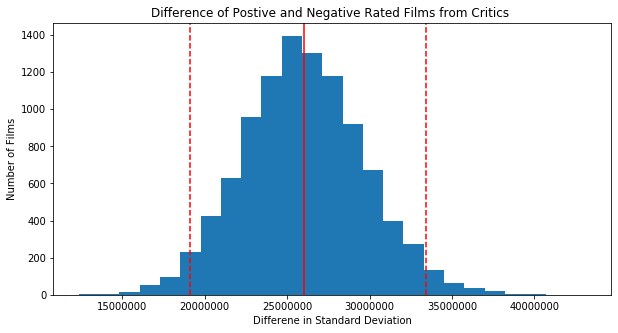

In [16]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [17]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

1645128.6118958443

In [18]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [19]:
def permutation(d1,d2):
    d3 = np.concatenate((d1,d2))
    data = np.random.permutation(d3)
    perm_sample1 = data[:len(d1)]
    perm_sample2 = data[len(d1):]
    return perm_sample1,perm_sample2

In [20]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [21]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0819

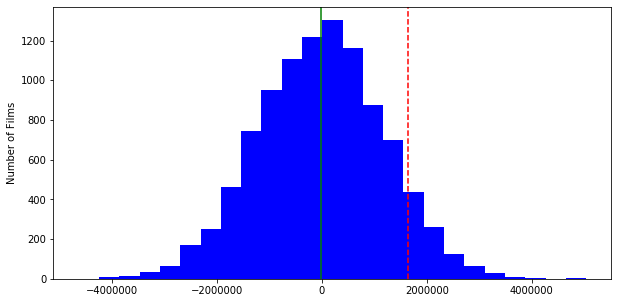

In [22]:
_ = plt.figure(figsize=(10,5))
_ = plt.ylabel('Number of Films')
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


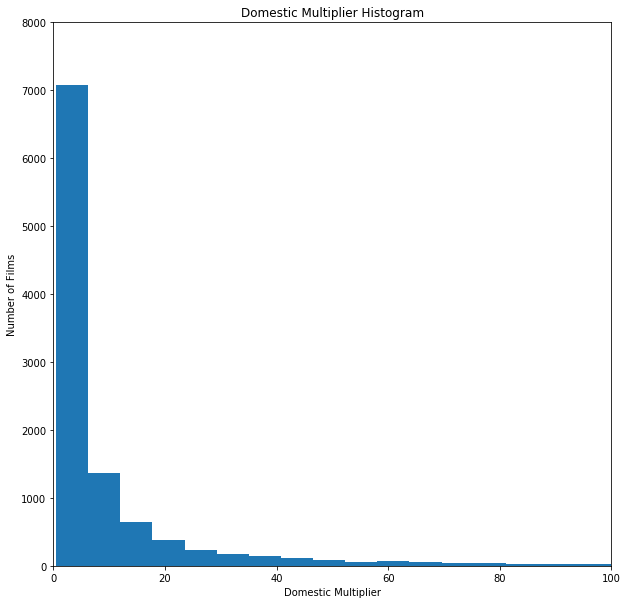

In [23]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(bodf['multiplier'],bins=1000)
_ = plt.title('Domestic Multiplier Histogram')
_ = plt.xlabel('Domestic Multiplier')
_ = plt.ylabel('Number of Films')
_ = plt.ylim(0,8000)
_ = plt.xlim(0,100)

In [24]:
multiplier_df = bodf[bodf['multiplier'].notnull()]
multiplier = multiplier_df['multiplier']
multiplier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11022 entries, 0 to 45373
Data columns (total 22 columns):
imdbID                   9935 non-null object
Title                    11022 non-null object
Year                     11022 non-null object
Rated                    10581 non-null object
Budget                   2896 non-null float64
Domestic Gross           11022 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               11021 non-null float64
imdbVotes                11020 non-null float64
Rotten Tomatoes Score    10390 non-null float64
Metascore                8427 non-null float64
Genre                    11020 non-null object
Runtime                  11019 non-null float64
Director                 11017 non-null object
Actors                   10972 non-null object
Awards                   9010 non-null object
vote_average             10874 non-null float64
vote_count               10874 non-null float64
belongs_to_collection    1364 non-null 

In [25]:
multiplier_mean = multiplier.mean()
multiplier_std = multiplier.std()
print('Multiplier Mean:  ',multiplier_mean)
print('Multiplier STD:  ',multiplier_std)

Multiplier Mean:   22.756283565105736
Multiplier STD:   118.10983175753526


In [26]:
n = len(multiplier)
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20811153.23111374

In [27]:
good_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] >= 80]
bad_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] <= 40]
ttest_ind(good_reception.multiplier, bad_reception.multiplier)

Ttest_indResult(statistic=11.06395602806466, pvalue=3.4710327856231197e-28)

In [28]:
ttest_ind(good_reception.multiplier, bad_reception.multiplier, equal_var= False)

Ttest_indResult(statistic=11.054542699708865, pvalue=3.895022650453142e-28)

In [29]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035 entries, 0 to 45263
Data columns (total 22 columns):
imdbID                   2771 non-null object
Title                    3035 non-null object
Year                     3035 non-null object
Rated                    2869 non-null object
Budget                   589 non-null float64
Domestic Gross           3035 non-null float64
Opening Weekend          3035 non-null float64
imdbRating               3035 non-null float64
imdbVotes                3034 non-null float64
Rotten Tomatoes Score    3035 non-null float64
Metascore                2550 non-null float64
Genre                    3034 non-null object
Runtime                  3035 non-null float64
Director                 3033 non-null object
Actors                   3000 non-null object
Awards                   2858 non-null object
vote_average             2985 non-null float64
vote_count               2985 non-null float64
belongs_to_collection    341 non-null object
production

In [30]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3075 entries, 2 to 45373
Data columns (total 22 columns):
imdbID                   2725 non-null object
Title                    3075 non-null object
Year                     3075 non-null object
Rated                    3043 non-null object
Budget                   1099 non-null float64
Domestic Gross           3075 non-null float64
Opening Weekend          3075 non-null float64
imdbRating               3075 non-null float64
imdbVotes                3075 non-null float64
Rotten Tomatoes Score    3075 non-null float64
Metascore                2295 non-null float64
Genre                    3075 non-null object
Runtime                  3075 non-null float64
Director                 3075 non-null object
Actors                   3075 non-null object
Awards                   2164 non-null object
vote_average             3048 non-null float64
vote_count               3048 non-null float64
belongs_to_collection    442 non-null object
productio

In [31]:
good_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,5.890000e+02,3.035000e+03,3.035000e+03,3035.000000,3.034000e+03,3035.000000,2550.000000,3035.000000,2985.000000,2985.000000,3035.000000
mean,4.311685e+07,2.434493e+07,4.279396e+06,7.264679,8.156273e+04,89.312356,75.040392,107.168369,6.060436,270.777554,45.944776
std,5.188834e+07,6.254080e+07,1.605748e+07,0.561983,1.879534e+05,5.879808,8.654314,25.626256,1.714082,871.423632,137.967082
min,2.200000e+02,5.820000e+02,3.000000e+01,4.600000,3.800000e+01,80.000000,31.000000,34.000000,0.000000,0.000000,0.480129
25%,8.000000e+06,1.068885e+05,1.081050e+04,6.900000,2.645750e+03,84.000000,69.000000,92.000000,5.500000,5.000000,4.424689
50%,2.200000e+07,1.082124e+06,4.116500e+04,7.300000,1.146050e+04,89.000000,75.000000,103.000000,6.500000,20.000000,10.968051
75%,5.500000e+07,1.642862e+07,3.655845e+05,7.600000,5.950350e+04,94.000000,81.000000,117.000000,7.100000,109.000000,34.298741
max,2.600000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,11444.000000,4468.300000


In [32]:
bad_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,1.099000e+03,3.075000e+03,3.075000e+03,3075.000000,3075.000000,3075.000000,2295.000000,3075.000000,3048.000000,3048.000000,3075.000000
mean,4.466194e+07,2.207046e+07,7.074535e+06,5.566179,33835.135610,22.512846,36.070153,100.792520,5.560958,141.532152,9.218121
std,3.956194e+07,3.382518e+07,1.103892e+07,0.869681,53605.679182,11.345411,10.405043,13.763946,1.478399,472.500488,121.059249
min,5.000000e+04,9.500000e+01,8.800000e+01,1.500000,19.000000,0.000000,1.000000,55.000000,0.000000,0.000000,0.999984
25%,1.700000e+07,5.641230e+05,1.270960e+05,5.100000,3996.000000,14.000000,30.000000,91.000000,5.000000,7.000000,2.161899
50%,3.500000e+07,1.011501e+07,3.427840e+06,5.700000,12237.000000,23.000000,37.000000,99.000000,5.700000,24.000000,2.715404
75%,6.000000e+07,2.981942e+07,9.351290e+06,6.200000,39828.000000,33.000000,44.000000,108.000000,6.400000,95.000000,3.715458
max,2.500000e+08,4.021119e+08,1.428391e+08,8.300000,455175.000000,40.000000,68.000000,219.000000,10.000000,12114.000000,5757.944732


In [33]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [34]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception.multiplier, len(good_reception.multiplier))
    bad_sample = np.random.choice(bad_reception.multiplier, len(bad_reception.multiplier))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([-75.92466973, 120.42076445])

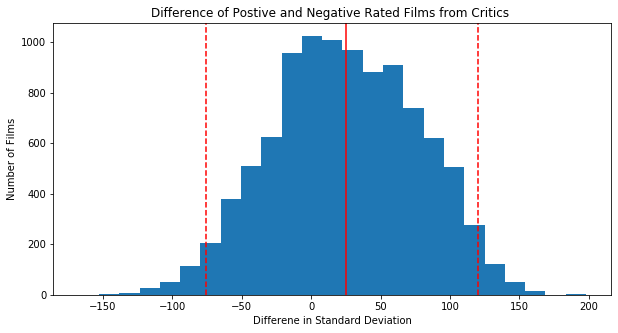

In [35]:
_ = plt.figure(figsize=(10,5))
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [36]:
mean_diff = np.mean(good_reception['multiplier']) - np.mean(bad_reception['multiplier'])
mean_diff

36.726654376012405

In [37]:
np.random.seed(47)
bad_shifted = bad_reception.multiplier - np.mean(bad_reception.multiplier) + np.mean(good_reception.multiplier)

In [38]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception.multiplier,bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [39]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

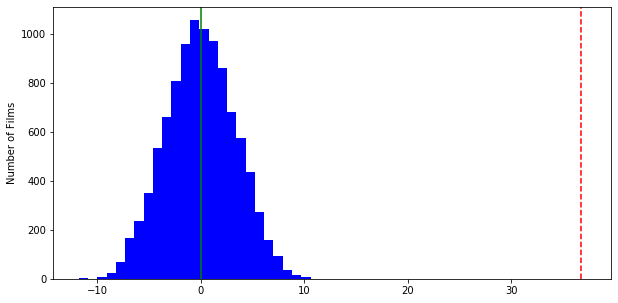

In [40]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

In [41]:
good_reception = bodf[bodf['imdbRating'] > 7.5]
bad_reception = bodf[bodf['imdbRating'] < 5.5]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=10.53086741859825, pvalue=1.6454432563032533e-25)

In [42]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=9.647709014383754, pvalue=1.816727978608195e-21)

In [43]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 45165
Data columns (total 22 columns):
imdbID                   1274 non-null object
Title                    1401 non-null object
Year                     1401 non-null object
Rated                    1316 non-null object
Budget                   353 non-null float64
Domestic Gross           1401 non-null float64
Opening Weekend          1222 non-null float64
imdbRating               1401 non-null float64
imdbVotes                1400 non-null float64
Rotten Tomatoes Score    1352 non-null float64
Metascore                1106 non-null float64
Genre                    1401 non-null object
Runtime                  1398 non-null float64
Director                 1397 non-null object
Actors                   1391 non-null object
Awards                   1334 non-null object
vote_average             1377 non-null float64
vote_count               1377 non-null float64
belongs_to_collection    215 non-null object
production

In [44]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 63 to 45366
Data columns (total 22 columns):
imdbID                   1546 non-null object
Title                    1748 non-null object
Year                     1748 non-null object
Rated                    1712 non-null object
Budget                   488 non-null float64
Domestic Gross           1748 non-null float64
Opening Weekend          1634 non-null float64
imdbRating               1748 non-null float64
imdbVotes                1748 non-null float64
Rotten Tomatoes Score    1482 non-null float64
Metascore                1078 non-null float64
Genre                    1748 non-null object
Runtime                  1748 non-null float64
Director                 1748 non-null object
Actors                   1748 non-null object
Awards                   1107 non-null object
vote_average             1725 non-null float64
vote_count               1725 non-null float64
belongs_to_collection    278 non-null object
productio

In [45]:
good_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,3.530000e+02,1.401000e+03,1.222000e+03,1401.000000,1.400000e+03,1352.000000,1106.000000,1398.000000,1377.000000,1377.000000,1222.000000
mean,4.937246e+07,3.644593e+07,6.977554e+06,7.869879,1.642971e+05,87.261095,75.354430,116.967096,6.412200,504.199710,53.736764
std,5.603142e+07,8.002762e+07,2.150063e+07,0.269827,2.789252e+05,11.907453,11.822942,39.440944,1.712411,1232.243034,129.229273
min,2.700000e+04,2.110000e+02,8.600000e+01,7.600000,3.000000e+01,19.000000,28.000000,5.000000,0.000000,0.000000,0.480129
25%,1.120000e+07,1.773450e+05,1.228500e+04,7.700000,5.835000e+03,83.000000,68.000000,96.000000,5.800000,8.000000,4.281085
50%,2.500000e+07,2.087128e+06,5.996100e+04,7.800000,3.254150e+04,91.000000,76.000000,111.000000,7.000000,38.000000,11.613903
75%,6.500000e+07,3.440030e+07,9.247440e+05,8.000000,2.042750e+05,95.000000,84.000000,130.000000,7.500000,315.000000,39.069659
max,2.600000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,11444.000000,1337.085761


In [46]:
bad_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,4.880000e+02,1.748000e+03,1.634000e+03,1748.000000,1748.000000,1482.000000,1078.000000,1748.000000,1725.000000,1725.000000,1634.000000
mean,3.816936e+07,1.488318e+07,5.297244e+06,4.749256,16902.073227,23.081646,34.535250,97.552059,5.232638,100.891594,5.999410
std,3.423368e+07,2.722277e+07,9.584096e+06,0.684270,29995.636185,17.697685,13.186758,14.377331,1.680990,351.793242,48.132842
min,5.000000e+04,3.000000e+01,2.000000e+01,1.500000,19.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.999984
25%,1.400000e+07,1.467982e+05,5.014925e+04,4.500000,1830.250000,10.000000,25.250000,89.000000,4.600000,5.000000,1.950130
50%,2.650000e+07,4.617134e+06,2.136180e+06,5.000000,5959.500000,19.000000,34.000000,95.000000,5.300000,16.000000,2.468785
75%,5.425000e+07,1.732416e+07,6.328772e+06,5.225000,18971.000000,33.000000,43.000000,102.000000,6.300000,59.000000,3.337099
max,2.170000e+08,3.005318e+08,1.428391e+08,5.400000,401686.000000,93.000000,73.000000,255.000000,10.000000,6324.000000,1429.432528


In [47]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(bodf['Domestic Gross'],len(bodf['Domestic Gross'])))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [48]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([41989618.33889896, 64092731.19290581])

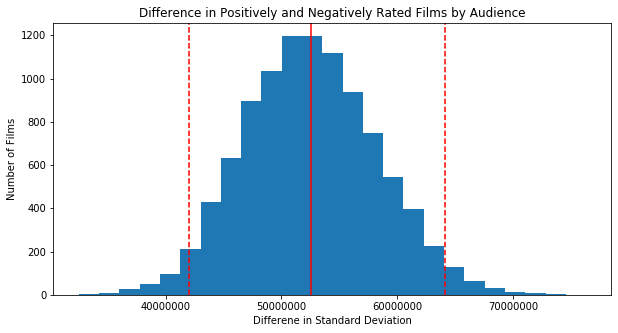

In [49]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.title('Difference in Positively and Negatively Rated Films by Audience')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [50]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

21562746.958332308

In [51]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [52]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [53]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

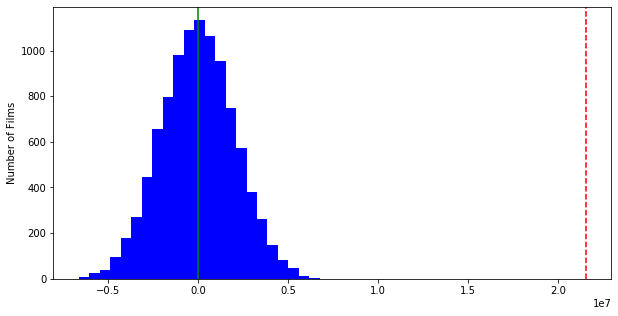

In [54]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

In [55]:
good_reception = multiplier_df[multiplier_df['imdbRating'] >= 7.5]
bad_reception = multiplier_df[multiplier_df['imdbRating'] <= 5.5]
ttest_ind(good_reception.multiplier, bad_reception.multiplier)

Ttest_indResult(statistic=12.863954175531452, pvalue=5.188186792388572e-37)

In [56]:
ttest_ind(good_reception.multiplier, bad_reception.multiplier, equal_var= False)

Ttest_indResult(statistic=12.158341057591917, pvalue=5.562531411374487e-33)

In [57]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 0 to 45187
Data columns (total 22 columns):
imdbID                   1394 non-null object
Title                    1522 non-null object
Year                     1522 non-null object
Rated                    1434 non-null object
Budget                   375 non-null float64
Domestic Gross           1522 non-null float64
Opening Weekend          1522 non-null float64
imdbRating               1522 non-null float64
imdbVotes                1521 non-null float64
Rotten Tomatoes Score    1472 non-null float64
Metascore                1237 non-null float64
Genre                    1522 non-null object
Runtime                  1519 non-null float64
Director                 1518 non-null object
Actors                   1507 non-null object
Awards                   1445 non-null object
vote_average             1496 non-null float64
vote_count               1496 non-null float64
belongs_to_collection    199 non-null object
production

In [58]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 7 to 45366
Data columns (total 22 columns):
imdbID                   1661 non-null object
Title                    1874 non-null object
Year                     1874 non-null object
Rated                    1837 non-null object
Budget                   562 non-null float64
Domestic Gross           1874 non-null float64
Opening Weekend          1874 non-null float64
imdbRating               1874 non-null float64
imdbVotes                1874 non-null float64
Rotten Tomatoes Score    1642 non-null float64
Metascore                1213 non-null float64
Genre                    1874 non-null object
Runtime                  1874 non-null float64
Director                 1874 non-null object
Actors                   1874 non-null object
Awards                   1219 non-null object
vote_average             1847 non-null float64
vote_count               1847 non-null float64
belongs_to_collection    295 non-null object
production

In [59]:
good_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,3.750000e+02,1.522000e+03,1.522000e+03,1522.000000,1.521000e+03,1472.000000,1237.000000,1519.000000,1496.000000,1496.000000,1522.000000
mean,5.175207e+07,3.522177e+07,6.326616e+06,7.796255,1.530556e+05,86.066576,74.282943,115.245556,6.276203,449.236631,53.762620
std,5.533967e+07,7.975043e+07,2.035744e+07,0.284498,2.689384e+05,12.386685,11.604282,37.484326,1.737348,1181.332665,134.596303
min,2.700000e+04,2.110000e+02,8.600000e+01,7.500000,3.000000e+01,19.000000,28.000000,7.000000,0.000000,0.000000,0.480129
25%,1.450000e+07,1.617100e+05,1.228500e+04,7.600000,5.118000e+03,81.000000,68.000000,95.000000,5.700000,7.000000,4.285543
50%,3.000000e+07,1.600878e+06,5.160250e+04,7.700000,2.700200e+04,89.000000,75.000000,110.000000,6.700000,29.000000,11.716726
75%,6.850000e+07,3.162919e+07,7.295305e+05,7.975000,1.777950e+05,95.000000,83.000000,127.000000,7.400000,218.000000,39.288812
max,2.600000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,11444.000000,1646.485102


In [60]:
bad_reception.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count,multiplier
count,5.620000e+02,1.874000e+03,1.874000e+03,1874.000000,1874.000000,1642.000000,1213.000000,1874.000000,1847.000000,1847.000000,1874.000000
mean,3.940507e+07,1.626861e+07,5.509261e+06,4.846745,18842.302561,23.845311,35.407255,97.877801,5.272225,106.761776,7.048904
std,3.440360e+07,2.871325e+07,1.006811e+07,0.684402,32315.145308,17.981586,13.240752,13.942851,1.643244,355.162424,73.196268
min,5.000000e+04,3.000000e+01,2.000000e+01,1.500000,19.000000,0.000000,1.000000,60.000000,0.000000,0.000000,0.999984
25%,1.500000e+07,1.691865e+05,4.869250e+04,4.600000,2130.500000,11.000000,26.000000,90.000000,4.700000,5.000000,1.966967
50%,3.000000e+07,5.574408e+06,2.186745e+06,5.100000,6698.500000,19.500000,35.000000,95.000000,5.300000,18.000000,2.498905
75%,5.650000e+07,1.971955e+07,6.609927e+06,5.300000,20744.250000,34.000000,44.000000,103.000000,6.300000,65.000000,3.389423
max,2.170000e+08,3.005318e+08,1.428391e+08,5.500000,401686.000000,100.000000,76.000000,255.000000,10.000000,6324.000000,2505.688057


In [61]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [62]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception.multiplier, len(good_reception.multiplier))
    bad_sample = np.random.choice(bad_reception.multiplier, len(bad_reception.multiplier))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([ 12.91763416, 119.55957122])

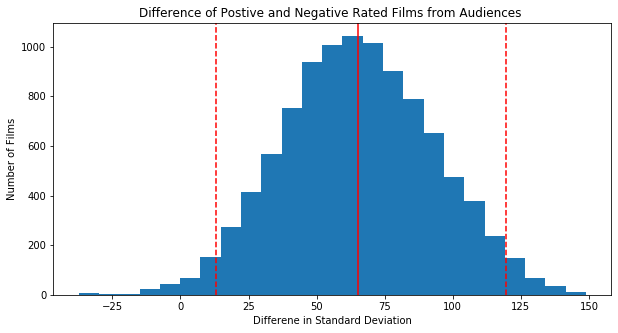

In [63]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Audiences ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [64]:
mean_diff = np.mean(good_reception['multiplier']) - np.mean(bad_reception['multiplier'])
mean_diff

46.71371523088091

In [65]:
np.random.seed(47)
bad_shifted = bad_reception.multiplier - np.mean(bad_reception.multiplier) + np.mean(good_reception.multiplier)

In [66]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception.multiplier,bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [67]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

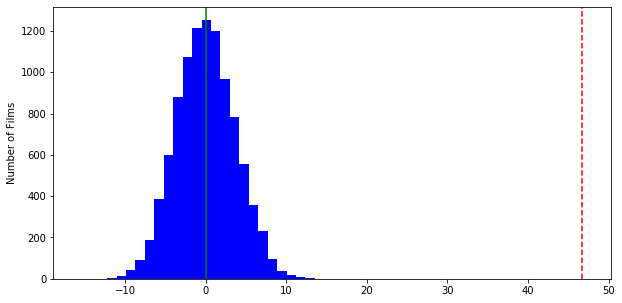

In [68]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')